非常好的问题！我们来详细解释：

---

## 🧠 什么是预训练模型（Pretrained Model）？

### ✅ 简单定义：

> **预训练模型**是指在大规模数据集（如 ImageNet）上已经训练好的深度学习模型。我们可以直接使用这些模型的权重，而不是从头开始训练。

---

## 🤔 为什么要用预训练模型？

1. **节省时间**：不需要从头开始训练，收敛更快。
2. **提升性能**：预训练模型已经学到了很多通用特征（如边缘、纹理等），对新任务有很好的泛化能力。
3. **适用于小数据集**：如果你的数据量不大，使用预训练模型可以避免过拟合。

---

## 🔁 预训练模型的工作原理

- 在大型数据集（如 ImageNet）上训练好一个模型（如 ResNet、VGG、EfficientNet 等）。
- 使用这个模型的特征提取器部分（即前面的卷积层），冻结或微调其参数。
- 将最后的分类层替换成你自己的任务需要的输出类别数。
- 在你的小数据集上进行微调（fine-tune）。

---

## 🧱 常见的预训练模型（图像领域）

| 模型名称 | 特点 |
|----------|------|
| **ResNet** | 残差连接，适合大多数任务 |
| **VGG** | 结构简单，但参数多 |
| **EfficientNet** | 平衡精度与速度 |
| **DenseNet** | 密集连接，特征复用好 |
| **MobileNet** | 轻量级，适合移动端部署 |

---

## 🛠 如何构造一个预训练模型（以 PyTorch 为例）

我们以 `torchvision.models.resnet18` 为例，演示如何加载一个预训练模型并修改最后的分类层。

### ✅ 步骤一：导入模型

```python
import torchvision.models as models

# 加载预训练的 ResNet18 模型
model = models.resnet18(pretrained=True)
```

- `pretrained=True` 表示使用在 ImageNet 上预训练好的权重。

---

### ✅ 步骤二：查看模型结构（可选）

```python
print(model)
```

你会看到类似这样的结构：

```text
(...
 fc: Linear(in_features=512, out_features=1000, bias=True)
)
```

默认情况下，最后的全连接层输出是 1000 类（ImageNet 的类别数）。

---

### ✅ 步骤三：修改最后一层（适配你的任务）

假设你要做的是 **4类天气分类**，那么你需要把最后一层改成输出为 4 的线性层：

```python
model.fc = nn.Linear(in_features=512, out_features=4)
```

> 注意：不同模型的 `in_features` 不同，比如 ResNet18 是 512，ResNet50 是 2048。

---

### ✅ 步骤四：冻结部分层（可选）

如果你想只训练最后的分类层，而冻结前面的卷积层，可以这样做：

```python
for param in model.parameters():
    param.requires_grad = False  # 冻结所有层

# 只训练最后一层
model.fc.requires_grad = True
```

---

### ✅ 步骤五：将模型移动到 GPU（如果可用）

```python
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
```

---

### ✅ 完整代码示例

```python
import torch
import torch.nn as nn
import torchvision.models as models

# 加载预训练的 ResNet18 模型
model = models.resnet18(pretrained=True)

# 修改最后一层，适配 4 类分类
model.fc = nn.Linear(in_features=512, out_features=4)

# 冻结前面的层（可选）
for param in model.parameters():
    param.requires_grad = False

model.fc.requires_grad = True  # 只训练最后一层

# 移动到 GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
```

---

## 📈 微调（Fine-tuning）技巧

| 技巧 | 说明 |
|------|------|
| **只训练最后一层** | 适合数据量小的情况 |
| **解冻部分高层卷积层一起训练** | 数据量较大时，可以获得更好的性能 |
| **使用较小的学习率** | 因为预训练模型已经学得不错了，不能太大步长破坏已有知识 |
| **使用迁移学习策略** | 包括特征提取、微调、分层学习率等 |

---

## 🎯 总结一句话：

> **预训练模型就是已经在大数据集上训练好的模型，我们可以直接使用它的权重，并根据自己的任务修改最后一层分类器，从而快速构建出高性能的小样本分类器。**

---

## 📚 扩展阅读建议：

- [PyTorch 官方文档 - Vision Models](https://pytorch.org/vision/stable/models.html)
- [Transfer Learning for Computer Vision Tutorial (PyTorch)](https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html)
- [Fast.ai - Practical Deep Learning for Coders](https://course.fast.ai/)

---

如果你告诉我你具体要做什么任务（比如天气识别、花朵分类、手写数字识别等），我可以为你推荐最适合的预训练模型和微调方式 😊

冻结部分层（Freezing Layers）是迁移学习中一个非常重要的概念，特别是在使用预训练模型时。让我们深入探讨一下这个概念及其背后的原理。

### 🧠 什么是冻结部分层？

在深度学习中，**冻结（Freezing）** 指的是固定某些层的权重，使其在训练过程中不会更新。这意味着在反向传播过程中，这些层的梯度不会被计算，也不会应用优化器的更新步骤。

### ✅ 冻结部分层的常见场景

1. **迁移学习**：当你使用一个在大规模数据集（如 ImageNet）上预训练好的模型来解决一个新的任务时，你可能会选择只微调（fine-tune）最后几层，而冻结前面的卷积层。
2. **资源限制**：如果你的硬件资源有限（如显存不足），冻结部分层可以减少需要更新的参数数量，从而降低内存占用和计算成本。
3. **小样本问题**：当你的新任务只有少量标注数据时，直接从头开始训练模型容易导致过拟合。通过冻结大部分预训练模型的层，并仅训练最后的分类层，可以利用预训练模型学到的通用特征，避免过拟合。

---

## 🔍 冻结部分层的原理

### 1. **为什么可以冻结？**

- **低层特征的通用性**：在深度卷积神经网络中，低层（靠近输入的部分）通常学习到一些通用的特征，如边缘、纹理等。这些特征对于许多视觉任务都是有用的，因此可以直接复用。
- **高层特征的特异性**：高层（靠近输出的部分）则学习到更具体的特征，这些特征与特定任务密切相关。为了适应新的任务，我们需要对这些层进行微调或重新训练。

### 2. **如何实现冻结？**

在 PyTorch 中，你可以通过设置 `requires_grad` 属性来控制某个参数是否需要计算梯度：

```python
for param in model.parameters():
    param.requires_grad = False  # 冻结所有层

# 解冻最后一层
model.fc.requires_grad = True
```

- `requires_grad=False` 表示该参数不会参与梯度计算，因此在反向传播时不会更新。
- `requires_grad=True` 表示该参数会参与梯度计算，并在优化器更新时改变其值。

### 3. **冻结的影响**

- **正向传播**：无论是否冻结，每一层都会正常进行前向传播计算，生成输出。
- **反向传播**：对于冻结的层，梯度不会被计算，因此这些层的权重不会更新。对于未冻结的层，梯度会被计算并用于更新权重。

---

## 📊 实际例子：天气识别任务

假设我们正在使用 ResNet18 来进行天气识别任务，原始模型是在 ImageNet 上预训练的。我们可以这样做：

### 1. **加载预训练模型**

```python
import torchvision.models as models
import torch.nn as nn

model = models.resnet18(pretrained=True)
```

### 2. **修改最后一层**

```python
num_ftrs = model.fc.in_features #获取模型最后一层全连接层（fc）的输入特征数（input features），也就是该层接受多少个输入神经元。
model.fc = nn.Linear(num_ftrs, 4)  # 假设我们要做4类天气分类
```

### 3. **冻结前面的层**

```python
for param in model.parameters():
    param.requires_grad = False  # 冻结所有层

# 解冻最后一层
model.fc.requires_grad = True
```

### 4. **定义损失函数和优化器**

由于我们只训练最后一层，优化器只需要关注这一层的参数：

```python
import torch.nn as nn

optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.001)

#定义损失函数
criterion = nn.CrossEntropyLoss()
```

> 注意：这里我们使用 `filter(lambda p: p.requires_grad, model.parameters())` 来确保优化器只更新那些 `requires_grad=True` 的参数。

### 5. **训练过程**

在训练过程中，只有未冻结的层会更新其权重：

```python
for epoch in range(num_epochs):
    for inputs, labels in dataloader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()  # 只有未冻结层的梯度会被计算
        optimizer.step()  # 只更新未冻结层的权重
```

---

## 🛠 冻结部分层的策略

### 1. **全部冻结 + 微调最后一层**

这是最简单的方法，适合数据量较小的任务：

```python
for param in model.parameters():
    param.requires_grad = False

model.fc = nn.Linear(num_ftrs, num_classes)
optimizer = torch.optim.Adam(model.fc.parameters(), lr=0.001)
```

### 2. **部分解冻 + 微调高层**

如果数据量较大，可以考虑解冻部分高层卷积层：

```python
for param in model.layer4.parameters():  # 解冻第4层（ResNet18的最后一层）
    param.requires_grad = True

optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.001)
```

### 3. **分层学习率**

有时你可能希望对不同层使用不同的学习率。例如，对于预训练的层使用较小的学习率，而对于新添加的层使用较大的学习率：

```python
# 定义两组参数
pretrained_params = []
new_params = []

for name, param in model.named_parameters():
    if name.startswith('fc'):  # 新添加的全连接层
        new_params.append(param)
    else:
        pretrained_params.append(param)

optimizer = torch.optim.Adam([
    {'params': pretrained_params, 'lr': 0.0001},
    {'params': new_params, 'lr': 0.001}
])
```

---

## 🎯 总结一句话：

> **冻结部分层的核心思想是利用预训练模型已经学到的通用特征，通过固定这些层的权重来避免破坏它们，同时微调或重新训练高层或新添加的层以适应新的任务。**

如果你还有更多关于迁移学习、预训练模型或其他深度学习方面的问题，欢迎继续提问！ 😊

# 代码实现 

## 导入包 

In [1]:
import torch
from torch.utils.data import TensorDataset,DataLoader
import torch.nn as nn 
import torch.nn.functional as F 
import torch.optim as optim 
import numpy as np 
import matplotlib.pyplot as plt 
import torchvision


In [19]:
from torchvision import transforms

## 创建DataLoader 

In [3]:
transforms = transforms.Compose(
    [
        transforms.Resize((192,192)) , 
        transforms.ToTensor(), 
        transforms.Normalize(mean=[0.5,0.5,0.5],std=[0.5,0.5,0.5])
    ]
)

In [4]:
Train_DS = torchvision.datasets.ImageFolder(
    '../01计算机视觉基础/4weather/train',
    transform=transforms
)

In [5]:
Tst_DS = torchvision.datasets.ImageFolder(
    '../01计算机视觉基础/4weather/test',
    transform=transforms
)

In [6]:
Train_DL = DataLoader(Train_DS,batch_size=32,shuffle=True)
Tst_DL = DataLoader(Tst_DS,batch_size=64,shuffle=False)

## 使用预训练模型 

In [7]:
# 加载预训练的 ResNet18 模型
model = torchvision.models.vgg16(pretrained=True)

D:\venvs\dl\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
D:\venvs\dl\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [8]:
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

## ❗❗ 修改最后一层，适配 4 类分类

In [9]:
# 修改最后一层，适配 4 类分类
model.classifier[6] = nn.Linear(in_features=4096,out_features=4)

In [10]:
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [11]:
# 冻结前面的层（可选）
for param in model.parameters():
    param.requires_grad = False

# model.fc.requires_grad = True  # 只训练最后一层
# 解冻最后一层 fc 的参数
for param in model.classifier[6].parameters():
    param.requires_grad = True
#设置优化器 ,因为我们已经冻结了原来的层,这时候只需要关注最后一层就可以了
optimizer = torch.optim.Adam(model.classifier[6].parameters(),lr=0.0001) #学习率不要太高,因为已经训练好了
#设置损失函数 
loss_fn = nn.CrossEntropyLoss()

In [12]:
# 打印出所有可训练参数的名称
print("可训练参数：")
for name, param in model.named_parameters():
    if param.requires_grad:
        print(f"  {name}")

可训练参数：
  classifier.6.weight
  classifier.6.bias


## 定义训练函数 

In [13]:
def fit_gpu(Train_DL,TST_DL,Model_m,epoch_,optim,loss_fn): 
    correct = 0
    total = 0
    running_loss = 0
    tstcorrect = 0
    tsttotal = 0
    tstrunning_loss = 0
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    Model_m.to(device)
  
    Model_m.train()  # 设置为训练模式,此时dropout层会发挥作用
    for x, y in Train_DL:
        x = x.to(device)
        y = y.to(device)
        
        y_pred = Model_m(x)
        loss = loss_fn(y_pred, y)
        optim.zero_grad()
        loss.backward()
        optim.step()

        # 每个epoch结束后评估模型
        # 所有 batch 都训练完后，再计算整个 epoch 的准确率和损失
        with torch.no_grad():
            y_pred = torch.argmax(y_pred,dim=1)  #沿着类别维度找到最大值的索引位置
            correct += (y_pred == y).sum().item() #预测正确的个数
            # 因为(y_pred == y).sum()是一个张量,所以为了等式可以数值操作,我们用.item()取值
            total += y.size(0) #样本的个数,也就是size返回值的第一个返回值,即行数
            running_loss += loss.item()

        
    epoch_acc = correct/total
    epoch_loss = running_loss/len(Train_DL.dataset)

    #测试阶段 
    Model_m.eval() #转为eval()模式,此时dropout层不会起作用
    with torch.no_grad(): #测试不需要反向传播,而是用训练好的模型来测试测试集的数据
         for x, y in TST_DL:
             x, y = x.to(device), y.to(device)
             y_pred =Model_m(x)
             loss = loss_fn(y_pred, y)
             
             y_pred = torch.argmax(y_pred,dim=1)   #获取真正的预测结果,不懂就往上巴拉argmax
             tstcorrect += (y_pred == y).sum().item() #预测正确的个数
             tsttotal += y.size(0) #样本的个数
             tstrunning_loss += loss.item()
             
    tstepoch_acc = tstcorrect/tsttotal
    tstepoch_loss = tstrunning_loss/len(TST_DL.dataset)

    print(
        f'epoch:{epoch} | loss:{epoch_loss:.3f} | acc:{epoch_acc:.3f} | tstloss:{tstepoch_loss:.3f} | tstacc:{tstepoch_acc:.3f}'
    )

    return epoch_loss,epoch_acc,tstepoch_loss,tstepoch_acc


## 开训 

In [14]:
train_loss_gpu=[] 
train_acc_gpu =[]  
tst_loss_gpu = [] 
tst_acc_gpu=[] 
epochs = 10
for epoch in range(epochs): 
    epoch_loss,epoch_acc,tstepoch_loss,tstepoch_acc = fit_gpu(Train_DL=Train_DL,TST_DL=Tst_DL,Model_m=model,epoch_=epoch,optim=optimizer,loss_fn=loss_fn)
    train_loss_gpu.append(epoch_loss)
    train_acc_gpu.append(epoch_acc)
    tst_loss_gpu.append(tstepoch_loss)
    tst_acc_gpu.append(tstepoch_acc)

epoch:0 | loss:0.038 | acc:0.493 | tstloss:0.016 | tstacc:0.751
epoch:1 | loss:0.028 | acc:0.756 | tstloss:0.012 | tstacc:0.853
epoch:2 | loss:0.022 | acc:0.832 | tstloss:0.010 | tstacc:0.902
epoch:3 | loss:0.018 | acc:0.859 | tstloss:0.008 | tstacc:0.907
epoch:4 | loss:0.016 | acc:0.884 | tstloss:0.007 | tstacc:0.920
epoch:5 | loss:0.014 | acc:0.902 | tstloss:0.007 | tstacc:0.920
epoch:6 | loss:0.013 | acc:0.896 | tstloss:0.006 | tstacc:0.929
epoch:7 | loss:0.011 | acc:0.907 | tstloss:0.006 | tstacc:0.924
epoch:8 | loss:0.011 | acc:0.922 | tstloss:0.005 | tstacc:0.929
epoch:9 | loss:0.010 | acc:0.921 | tstloss:0.005 | tstacc:0.924


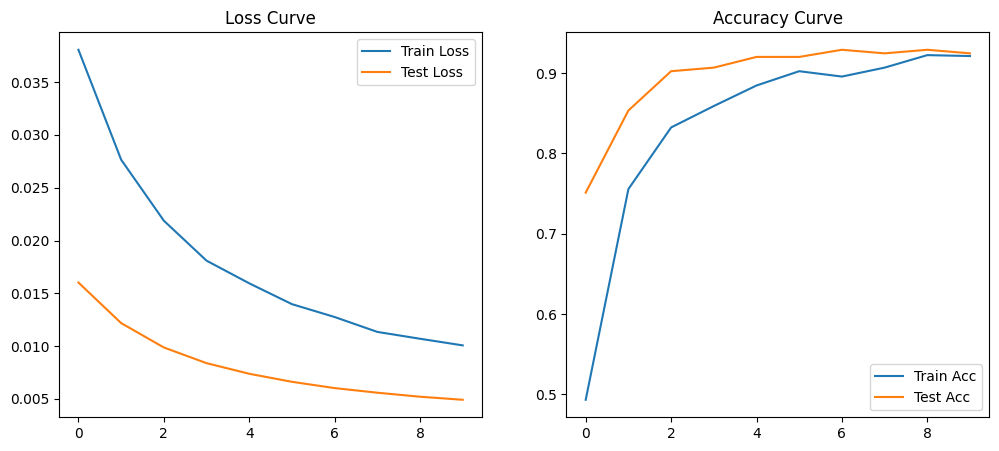

In [15]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_loss_gpu, label='Train Loss')
plt.plot(tst_loss_gpu, label='Test Loss')
plt.legend()
plt.title('Loss Curve')

plt.subplot(1, 2, 2)
plt.plot(train_acc_gpu, label='Train Acc')
plt.plot(tst_acc_gpu, label='Test Acc')
plt.legend()
plt.title('Accuracy Curve')

plt.show()

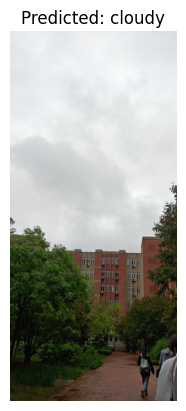

预测天气为: cloudy


In [24]:
from PIL import Image
# 类别名称（必须与训练时一致）
class_names = ['cloudy','rain','shine','sunrise']

# # 实例化模型
# model = Net_with_dropout_and_batchnorm()

# # 加载权重
# model.load_state_dict(torch.load('./models/model_weights_NetwithBNandDO.pth'))

# 检查是否有可用的GPU，如果有则使用，否则使用CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 确保模型位于正确的设备上
model.to(device)


model.eval()  # 设置为评估模式

# 图像预处理（必须和训练时一致）
transform = transforms.Compose(
    [
        transforms.Resize((192,192)) , 
        transforms.ToTensor(), 
        transforms.Normalize(mean=[0.5,0.5,0.5],std=[0.5,0.5,0.5])
    ]
)

# 读取图像
image_path = '../01计算机视觉基础/P20250517-081628.jpg'
image = Image.open(image_path).convert('RGB')

# 预处理 + 添加 batch 维度 (1, C, H, W)
image_tensor = transform(image).unsqueeze(0)
# 将输入数据移动到相同的设备上
image_tensor = image_tensor.to(device)
# 推理
with torch.no_grad():
    outputs = model(image_tensor)
    _, predicted_idx = torch.max(outputs, 1)
    predicted_class = class_names[predicted_idx.item()]

# 可视化结果
plt.imshow(image)
plt.title(f"Predicted: {predicted_class}")
plt.axis('off')
plt.show()

print(f"预测天气为: {predicted_class}")

In [26]:
torch.save(model.state_dict(),'./models/VGG16_fcout4.pth')

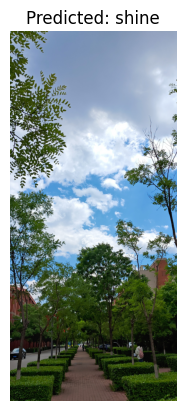

预测天气为: shine


In [31]:
import torch
from torchvision import transforms, models
from PIL import Image
import matplotlib.pyplot as plt

# 类别名称（必须与训练时一致）
class_names = ['cloudy', 'rain', 'shine', 'sunrise']

# 实例化模型
model = models.vgg16(pretrained=False)
model.classifier[6] = nn.Linear(4096, 4)  # 修改为输出 4 类

# 加载权重
model.load_state_dict(torch.load('./models/VGG16_fcout4.pth', map_location=torch.device('cpu')))  # 确保路径正确

# 检查是否有可用的GPU，如果有则使用，否则使用CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 确保模型位于正确的设备上
model.to(device)

model.eval()  # 设置为评估模式

# 图像预处理（必须和训练时一致）
transform = transforms.Compose([
    transforms.Resize((192, 192)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# 读取图像
image_path = '../01计算机视觉基础/P20250603-110607.jpg'
image = Image.open(image_path).convert('RGB')

# 预处理 + 添加 batch 维度 (1, C, H, W)
image_tensor = transform(image).unsqueeze(0)
# 将输入数据移动到相同的设备上
image_tensor = image_tensor.to(device)

# 推理
with torch.no_grad():
    outputs = model(image_tensor)
    _, predicted_idx = torch.max(outputs, 1) #获取一批中[得分1.得分2.得分3.得分4] 最高的得分索引即为预测的目标张量
    predicted_class = class_names[predicted_idx.item()]

# 可视化结果
plt.imshow(image)
plt.title(f"Predicted: {predicted_class}")
plt.axis('off')
plt.show()

print(f"预测天气为: {predicted_class}")

太棒了！你贴出了完整的代码，我们终于可以**一次性定位问题并彻底解决它**。

---

## ❗ 问题根源：你用的是 **VGG16 模型**，但错误地使用了 `model.fc`！

你在代码中写的是：

```python
model = torchvision.models.vgg16(pretrained=True)
```

但是你却这样修改最后一层：

```python
model.fc = nn.Linear(in_features=512, out_features=4)
```

### ⚠️ 错误就在这里！

在 VGG 系列模型中，**分类层的名字不是 `fc`，而是 `classifier`**！

所以当你试图访问 `model.fc` 的时候，其实你是在操作一个**根本不存在的属性**。PyTorch 并不会报错，但它会在你运行的时候自动创建一个新的 `model.fc` 属性，但这并不会连接到原来的计算图中！

---

## ✅ 正确做法：使用 `model.classifier` 替换最后一层

VGG16 的 `classifier` 是一个包含多个全连接层的 `Sequential` 容器，通常是这样的结构：

```python
(classifier): Sequential(
    (0): Linear(in_features=25088, out_features=4096, bias=True)
    (1): ReLU(inplace=True)
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=4096, out_features=4096, bias=True)
    (4): ReLU(inplace=True)
    (5): Dropout(p=0.5, inplace=False)
    (6): Linear(in_features=4096, out_features=1000, bias=True)
)
```

因此你应该替换最后一层（索引为 6）：

```python
model.classifier[6] = nn.Linear(4096, 4)  # 修改为输出 4 类
```

---

## ✅ 修改后的完整模型设置代码如下：

```python
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models

# 加载预训练的 VGG16 模型
model = models.vgg16(pretrained=True)

# 修改最后一层，适配 4 类分类
model.classifier[6] = nn.Linear(4096, 4)  # VGG16 最后一层是 classifier[6]

# 冻结前面的层（可选）
for param in model.parameters():
    param.requires_grad = False

# 解冻最后一层（即 classifier[6] 的参数）
for param in model.classifier[6].parameters():
    param.requires_grad = True

# 设置优化器，只优化最后一层的参数
optimizer = optim.Adam(model.classifier[6].parameters(), lr=0.0001)

# 设置损失函数
loss_fn = nn.CrossEntropyLoss()

# 打印出所有可训练参数的名称，用于调试
print("可训练参数：")
for name, param in model.named_parameters():
    if param.requires_grad:
        print(f"  {name}")
```

---

## ✅ 运行上面这段代码后，你应该看到类似输出：

```
可训练参数：
  classifier.6.weight
  classifier.6.bias
```

这说明你已经成功解冻了最后一层的权重和偏置，反向传播时就能正常更新这些参数了。

---

## ✅ 其他建议

- 如果你不确定模型结构，可以用以下方式打印整个模型结构：

```python
print(model)
```

- 如果你想更灵活地替换最后一层，也可以自定义一个新的 `Sequential`：

```python
model.classifier = nn.Sequential(*list(model.classifier.children())[:-1])  # 去掉最后一层
model.classifier.append(nn.Linear(4096, 4))  # 添加新的最后一层
```

---

## ✅ 总结一句话：

> ❗你遇到的错误是因为你对 VGG16 使用了 `model.fc` 这个错误的属性名，导致你没有真正修改模型的最后一层，也没有正确解冻任何参数。你应该使用 `model.classifier[6]` 来替换和解冻最后一层。

---

如果你现在再运行你的 `fit_gpu()` 函数，应该就不会再报这个错误了！

如果你还有其他疑问，比如：

- 如何可视化训练过程？
- 如何保存最佳模型？
- 如何画 loss 和 accuracy 曲线？

欢迎继续提问 😊